# Linear regression with multiple variables

Implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

Text(0, 0.5, 'House price in $')

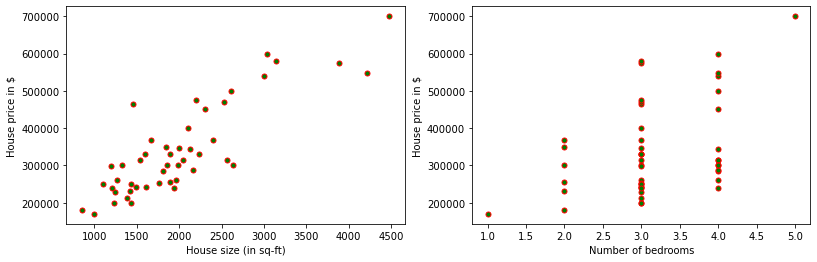

In [161]:
#Load data and plot data
with open('HousePriceData.txt','r') as f:
    data = f.readlines()
data = [list(map(float, i.split(','))) for i in data]
data = np.array(data)
X = data[:,:-1]; y = data[:,-1]
m = len(y)
y = y.reshape(m,1)

fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2, 1)
ax.plot(X[:,0],y,'ro',markersize=5,markerfacecolor = 'g')
plt.xlabel('House size (in sq-ft)')
plt.ylabel('House price in $')

ax = fig.add_subplot(1,2,2)
ax.plot(X[:,1],y,'ro',markersize=5,markerfacecolor = 'g')
plt.xlabel('Number of bedrooms')
plt.ylabel('House price in $')

## Data Processing

In [162]:
#Normalizing Features (Scale features and set them to zero mean)
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1,X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))
    m = X.shape[0]
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = np.divide((X-np.multiply(np.ones((m,1)),mu)),(np.multiply(np.ones((m,1)),sigma)))
    return X_norm,mu,sigma
X, mu, sigma = featureNormalize(X)

## Implement Cost function and Gradient Descent

In [163]:
X = np.append(np.ones((m,1)),X,axis=1)
alpha = 0.01
num_iters = 400

def computeCost(X,y,theta):
    m = y.shape[0]
    J = 0
    J = 1./(2*m)*np.sum( (X.dot(theta) - y)**2,axis=0)
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros((num_iters,1))
    for it in range(num_iters):
        theta = theta - alpha/m*(np.transpose(np.transpose(X.dot(theta) - y).dot(X)) )
        J_history[it] = computeCost(X,y,theta)
    return theta, J_history

theta = np.zeros((X.shape[1],1))
theta,J_history = gradientDescentMulti(X, y, theta, alpha, num_iters);

## Prediction of housing price

In [164]:
# 1650 sq.ft, 3 bed rooms

price = np.array([1, (1650-mu[0])/sigma[0], (3-mu[1])/sigma[1]]).dot(theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f' % price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $289221.547371


## Convergence of gradient with different learning rates

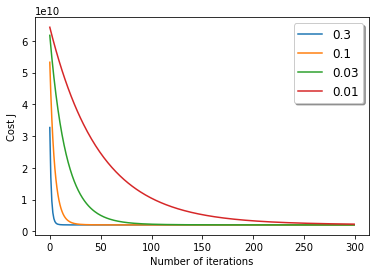

In [165]:
fig,ax = plt.subplots()
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
for i in [0.3,0.1,0.03,0.01]:
    iterations = 300
    J_history = np.zeros((iterations))
    theta = np.zeros((X.shape[1],1))
    _, J_history = gradientDescentMulti(X, y, theta, i, iterations)
    ax.plot(np.array(list(range(iterations))).reshape(-1), J_history, '-', label = i)

legend = ax.legend(loc='upper right', shadow=True, fontsize='large')